## Lab-2.2: Binary and multi-class classification via neural-networks

* In this lab we perform binary classification on the IMDB dataset and multi-class classification on the Newswire data-set. 

**Instructions** 
* Code both binary and multi-class using a deep feed forward fully connected Neural network
  * Binary classification: IMDB data-set 
  * Multi-class classification: Newswire data-set 
  * **Do each example with Keras AND then Pytorch**
  * Use a dense feed forward ANN model
  * Normalize the data as needed
  * Visualize the results at the end where possible
  * Partition data into training, validation, and test
  * Monitor training and validation throughout training by plotting
  * Print training, validation, and test errors at the very end
  * Do basic hyper parameter tuning to try to achieve an optimal fit model
    * i.e. best training/validation loss without over-fitting
    * Explore L1 and L2 regularization
    * Explore different optimizers 
    * Use the loss functions specified in the textbook
    * Explore different options for activation functions, network size/depth, etc
* **Document what is going on in the code, as needed, with narrative markdown text between cells.**
* *Submit the version with hyper parameters that provide the optimal fit*
  * i.e. you don't need to show the outputs of your hyper-parameter tuning process
  
**Important: The Keras portion of this assignment is included as an example in the text book**
  *  Binary classification: See the textbook (Chollet chapter-3, page 68) for reference 
  *  Multi-class classification: See the textbook (Chollet chapter-3, page 78) for reference
  
**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Binary Classification

### Data preparation 

* Insert cells below

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/Users/yihuiliu_/opt/anaconda3/envs/anly580/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#normalizing the data
import numpy as np
for i in range(len(train_data)):
    mean = sum(train_data[i]) // len(train_data[i])
    
    std =[]
    for k in range(len(train_data[i])):
        train_data[i][k] -= meanlist[i]
        stdvalue = np.sqrt((np.sum(train_data[i][k] - meanlist[i]) **2)//len(train_data[i]))
        std.append(stdvalue)
        train_data[i][k] /= std[k]
        
        #test_data -= mean
        #test_data /= std

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Keras training

* Insert cells below

In [7]:
#model definition
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, #kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-09-29 13:17:02.945920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
#configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [11]:
#set aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [13]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5452 - acc: 0.7656 - val_loss: 0.4137 - val_acc: 0.8604
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3261 - acc: 0.8995 - val_loss: 0.3118 - val_acc: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2311 - acc: 0.9267 - val_loss: 0.3057 - val_acc: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1795 - acc: 0.9433 - val_loss: 0.2874 - val_acc: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1490 - acc: 0.9519 - val_loss: 0.2789 - val_acc: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1197 - acc: 0.9639 - val_loss: 0.3060 - val_acc: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0987 - acc: 0.9716 - val_loss: 0.3109 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0845 - a

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

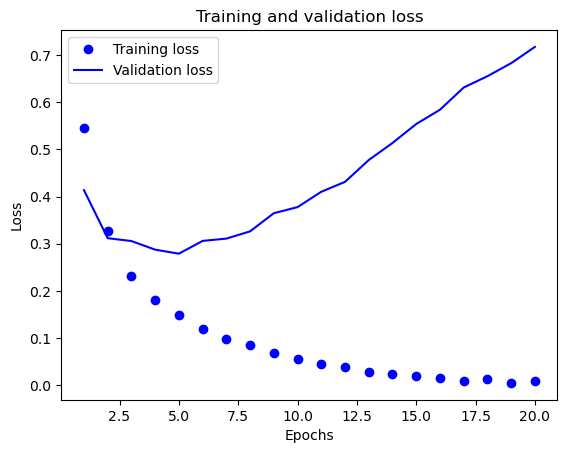

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

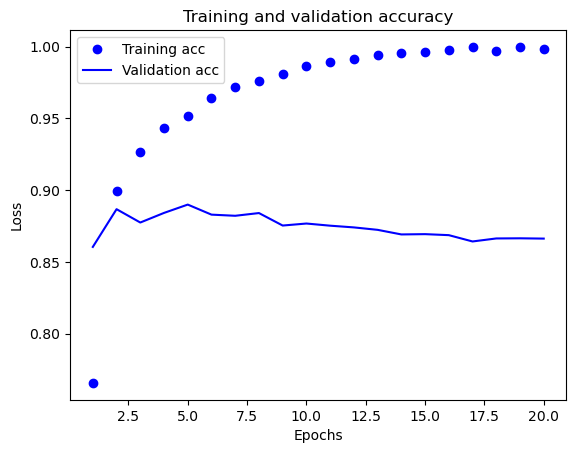

In [16]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4464 - accuracy: 0.8202
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2544 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1970 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2980 - accuracy: 0.8822


In [18]:
results

[0.29803264141082764, 0.8821600079536438]

In [19]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.19967103],
       [0.9996769 ],
       [0.8920338 ],
       ...,
       [0.06519258],
       [0.05165203],
       [0.6706481 ]], dtype=float32)

### Pytorch training

* Insert cells below

In [3]:
import torch
import torchvision

ModuleNotFoundError: No module named 'torch'

## Multi-class Classification

### Data preparation 

* Insert cells below

In [4]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/yihuiliu_/opt/anaconda3/envs/anly580/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
train_labels[10]

3

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Keras training

* Insert cells below

In [18]:
#model definition
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(64, #kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
#compiling the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#setting aside the validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.8071 - accuracy: 0.4826 - val_loss: 1.8432 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5096 - accuracy: 0.7045 - val_loss: 1.3197 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0753 - accuracy: 0.7772 - val_loss: 1.1193 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8319 - accuracy: 0.8231 - val_loss: 1.0145 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6577 - accuracy: 0.8664 - val_loss: 0.9484 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5279 - accuracy: 0.8948 - val_loss: 0.9151 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4241 - accuracy: 0.9148 - val_loss: 0.8859 - val_accuracy: 0.8150
Epoch 8/20
16

In [24]:
history_dict1 = history.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

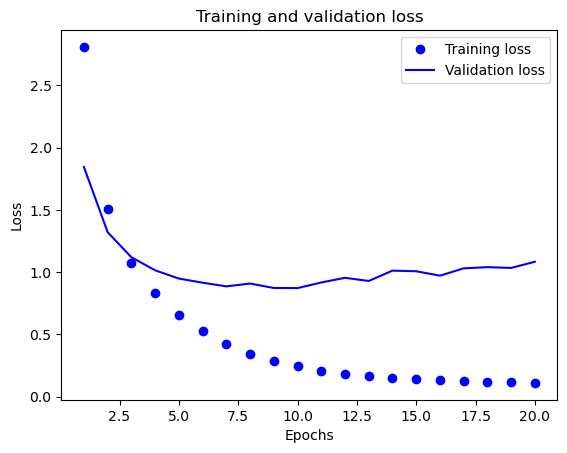

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

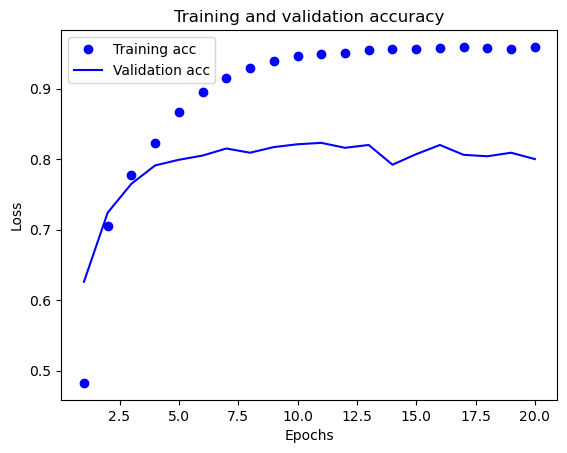

In [25]:
plt.clf()
acc = history_dict1['accuracy']
val_acc = history_dict1['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 40ms/step - loss: 2.5742 - accuracy: 0.5254 - val_loss: 1.7004 - val_accuracy: 0.6420
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.4130 - accuracy: 0.7087 - val_loss: 1.2980 - val_accuracy: 0.7060
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0562 - accuracy: 0.7739 - val_loss: 1.1442 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8324 - accuracy: 0.8172 - val_loss: 1.0499 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6701 - accuracy: 0.8534 - val_loss: 1.0041 - val_accuracy: 0.7760
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5362 - accuracy: 0.8890 - val_loss: 0.9608 - val_accuracy: 0.7950
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4382 - accuracy: 0.9095 - val_loss: 0.9195 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [28]:
results

[0.9978114366531372, 0.7889581322669983]

In [29]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17853962600178094

In [30]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

0.9999999

In [33]:
np.argmax(predictions[0])

3

In [ ]:
predictions = model.predict(x_test)

### Pytorch training

* Insert cells below